# mount google drive

In [133]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# set working directory

In [152]:
import os
os.chdir("/home/michael/github/CC0325/codes/matmat/")

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
# set theme, white background
sns.set_theme(style="whitegrid")

In [154]:
def plot_polynomial_fit(df, column_name, column_values, degree=2):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df[column_name], df[column_values], degree)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    sns.scatterplot(data=df, x=column_name, y=column_values, marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    sns.lineplot(data=df, x=column_name, y=poly(df[column_name]), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()


In [155]:
!make clean
!make run

# read the output file
df = pd.read_csv('output.txt')
df.head()

rm -f matmat.bin


g++ -std=c++11 -Wall -Wextra -O2 matmat.cpp -lblas -o matmat.bin
./matmat.bin
MatrixSize,BlockSize,Time(us)
200, 1, 25934
200, 4, 22308
200, 8, 17801
200, 16, 13860
200, 32, 13784
200, 64, 13823
300, 1, 85874
300, 4, 81340
300, 8, 58720
300, 16, 48927
300, 32, 48048
300, 64, 52706
400, 1, 222434
400, 4, 173996
400, 8, 128629
400, 16, 119655
400, 32, 114831
400, 64, 113046
500, 1, 396536
500, 4, 340357
500, 8, 251168
500, 16, 239037
500, 32, 234454
500, 64, 232477
600, 1, 758519
600, 4, 574298
600, 8, 474755
600, 16, 469883
600, 32, 394348
600, 64, 392755
700, 1, 1302560
700, 4, 855940
700, 8, 719208
700, 16, 694086
700, 32, 637208
700, 64, 736072
750, 1, 1653935
750, 4, 1131816
750, 8, 851997
750, 16, 857913
750, 32, 775869
750, 64, 741018
800, 1, 1992780
800, 4, 1533509
800, 8, 1174446
800, 16, 1047482
800, 32, 1022894
800, 64, 886289
850, 1, 2804697
850, 4, 1673957
850, 8, 1233851
850, 16, 1147120
850, 32, 1105281
850, 64, 991081
900, 1, 2735476
900, 4, 1857915
900, 8, 1503429
900, 1

,MatrixSize,BlockSize,Time(us)
0,200,1,25934
1,200,4,22308
2,200,8,17801
3,200,16,13860
4,200,32,13784


Polynomial Fit Equation: Poly(0.00196441366968811*x**3 + 4.10829702516141*x**2 - 2432.52414547665*x + 361605.881482351, x, domain='RR')


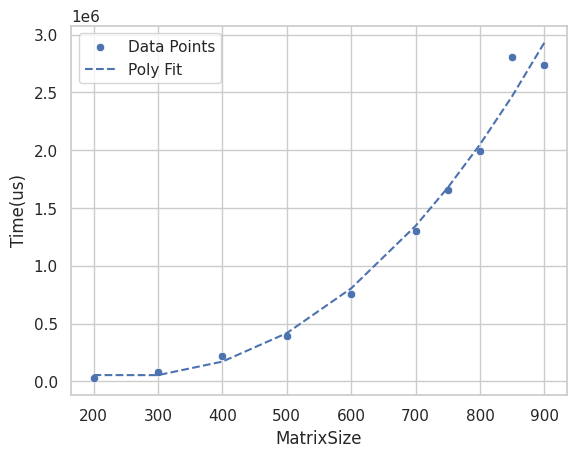

In [156]:
df_filtered = df[df['BlockSize'] == 1]
plot_polynomial_fit(df_filtered, 'MatrixSize', 'Time(us)', degree=3)

In [157]:
# Create a speedup dataframe for each block size
df.sort_values(by=['MatrixSize', 'BlockSize'], inplace=True)
df_speedup = {"MatrixSize": []}
for _, row in df.iterrows():
    matrix_size = row["MatrixSize"]
    if matrix_size not in df_speedup["MatrixSize"]:
        df_speedup["MatrixSize"].append(matrix_size)
    block_size = str(row["BlockSize"])
    if block_size not in df_speedup:
        df_speedup[block_size] = []
    df_speedup[block_size].append(row["Time(us)"])
df_speedup = pd.DataFrame(df_speedup)
df_speedup.head()

for block_size in df_speedup.columns[2:]:
    df_speedup[block_size] = df_speedup['1'] / df_speedup[block_size]

df_speedup


,MatrixSize,1,4,8,16,32,64
0,200,25934,1.162543,1.456884,1.871140,1.881457,1.876148
1,300,85874,1.055741,1.462432,1.755145,1.787254,1.629302
2,400,222434,1.278386,1.729268,1.858961,1.937055,1.967641
3,500,396536,1.165059,1.578768,1.658890,1.691317,1.705700
4,600,758519,1.320776,1.597706,1.614272,1.923476,1.931278
5,700,1302560,1.521789,1.811103,1.876655,2.044168,1.769609
6,750,1653935,1.461311,1.941245,1.927859,2.131719,2.231977
7,800,1992780,1.299490,1.696783,1.902448,1.948178,2.248454
8,850,2804697,1.675489,2.273125,2.444990,2.537542,2.829937
9,900,2735476,1.472336,1.819491,2.009574,2.102020,2.308089


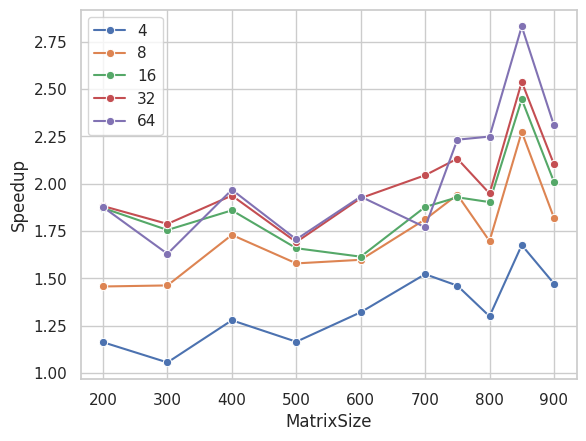

In [158]:
# lineplot for all columns except MatrixSize    
for block_size in df_speedup.columns[2:]:
    sns.lineplot(data=df_speedup, x='MatrixSize', y=block_size, label=block_size, marker='o')
plt.ylabel('Speedup')
plt.legend()
plt.show()